# Training a Convolutional Neural Network (CNN) on CIFAR-10 Using TensorFlow

This project introduces foundational concepts of deep learning with TensorFlow by building, training, and evaluating a Convolutional Neural Network (CNN) on the CIFAR-10 dataset. The goal is to classify 32x32 RGB images into 10 distinct categories (e.g., airplanes, cars, birds). Participants will gain hands-on experience with TensorFlow workflows, CNN architectures, and image classification techniques.

Model Performance: Achieve > 70% test accuracy (baseline).

In [1]:
# Import the necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras

In [2]:
# Set the random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

**Data Exploration**

In [4]:
type(train_images)

numpy.ndarray

In [5]:
print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
print(len(train_images))

50000


In [7]:
print(len(test_images))

10000


In [8]:
print(train_labels[0])

[6]


In [9]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Link to the class names: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data 

In [10]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

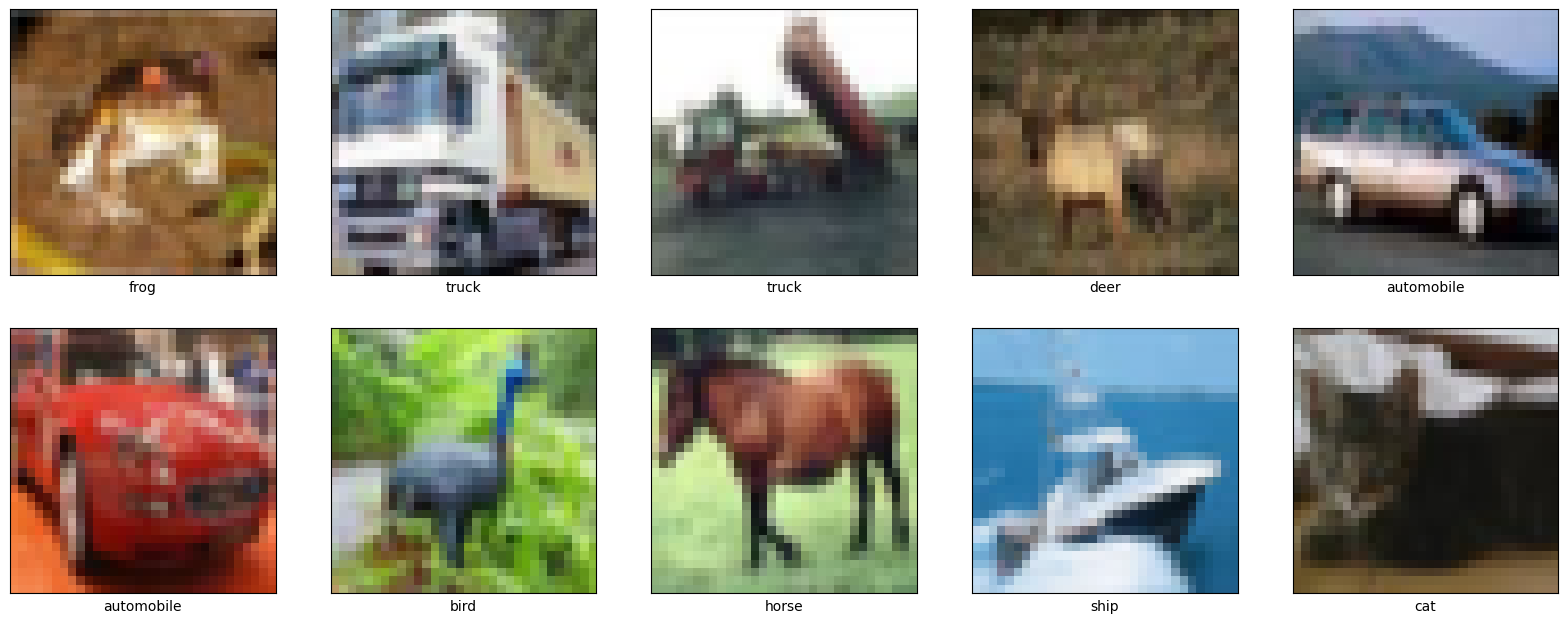

In [11]:
# plot to see how it looks
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i][0]])

In [12]:
print(train_images.shape)

(50000, 32, 32, 3)


**Preprocessing**

In [13]:
# Normalize the pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
# Split validation set from train images
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.10, random_state=42)

In [15]:
# Add Data Augmentation
data_augmentation = keras.models.Sequential([
    keras.layers.RandomFlip(), 
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomBrightness(0.2, value_range=(0, 1)),
    keras.layers.RandomContrast(0.1, value_range=(0, 1)),   
])

**Building the model**

In [16]:
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=[32, 32, 3]),
    # Data augmentation in model, better to do it outside the model, see Transfer Learning notebook
    data_augmentation,
    # C1 - Convolution layer
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    # S2 -  Pooling layer 
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    # C3
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    # S4
    keras.layers.MaxPool2D(pool_size=(2,2)),
    # C5
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    # C6
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    # S8
    keras.layers.MaxPool2D(pool_size=(2,2)),
    # B9
    keras.layers.BatchNormalization(),
    # F10 - Flatten the 3D outputs of the convolutional layers to 1D
    keras.layers.Flatten(),
    # D11 - Dense Layer
    keras.layers.Dense(units=256, activation="relu"),
    # Output layer
    keras.layers.Dense(units=10, activation="softmax")
])

# Model summary to show the details
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 377,802 (1.44 MB)

 Trainable params: 377,674 (1.44 MB)

 Non-trainable params: 128 (512.00 B)

In [17]:
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Set up callbacks
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True), # if it stops improving after 10 epochs, the training stops. restore_best_weigths restores the model's weights from the epoch with best values
    keras.callbacks.ModelCheckpoint("cifar10_bm.keras", save_best_only=True), # this saves the model at regular intervals but at the epochs with best results
]

# Train
history = model.fit(train_images, train_labels, epochs=100, validation_data=(val_images, val_labels), callbacks=my_callbacks) 

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 120s 79ms/step - accuracy: 0.3257 - loss: 1.8753 - val_accuracy: 0.3784 - val_loss: 1.7945
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 106s 75ms/step - accuracy: 0.4614 - loss: 1.5058 - val_accuracy: 0.4882 - val_loss: 1.4779
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 114s 81ms/step - accuracy: 0.5070 - loss: 1.3897 - val_accuracy: 0.4388 - val_loss: 1.7796
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 112s 79ms/step - accuracy: 0.5272 - loss: 1.3242 - val_accuracy: 0.5146 - val_loss: 1.4248
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 109s 77ms/step - accuracy: 0.5514 - loss: 1.2715 - val_accuracy: 0.5418 - val_loss: 1.3261
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 146s 80ms/step - accuracy: 0.5665 - loss: 1.2296 - val_accuracy: 0.5720 - val_loss: 1.2312
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 140s 78ms/step - accuracy: 0.5818 - loss: 1.1943 - val_accuracy: 0.5896 - val_loss: 1.2514
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 139s 76ms/step - ac

Early Stopping stops it at epoch 47/100, with an accuracy of 71% and val accuracy of 68%. It is not overfitting and the baseline is that it should be greater than 70%. This is the best I could do without transfer learning. I was able to increase the accuracy with transfer learning. See notebook on transfer learning for more details. Now let's use Tensor board to visualize how it performs.

In [19]:
# Visualize how it performs using Tensorborard
%load_ext tensorboard

In [21]:
%tensorboard --logdir logs/fit

**Evaluation**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 69% 

See how I increased the accuracy with transfer learning of ResNet50